In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [5]:
df = df.dropna(subset=['245_a','100_7'])
df = df.drop_duplicates(subset=['245_a','100_7'])

In [7]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))

In [8]:
autority.sample()

,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ola2011646004,None,None,[1965],None,[ola2011646004],"[Hauke, Marcela,]",[1965-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Narozena 28. 7. 1965 v Kronově. Původně zdrav...,[http://marcela.hauke.cz],cz a22 n 4500


In [17]:
autority[autority['100_7'].str.contains('Ronaldo',na=False)]

,024_2,024_a,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


<Axes: xlabel='rok'>

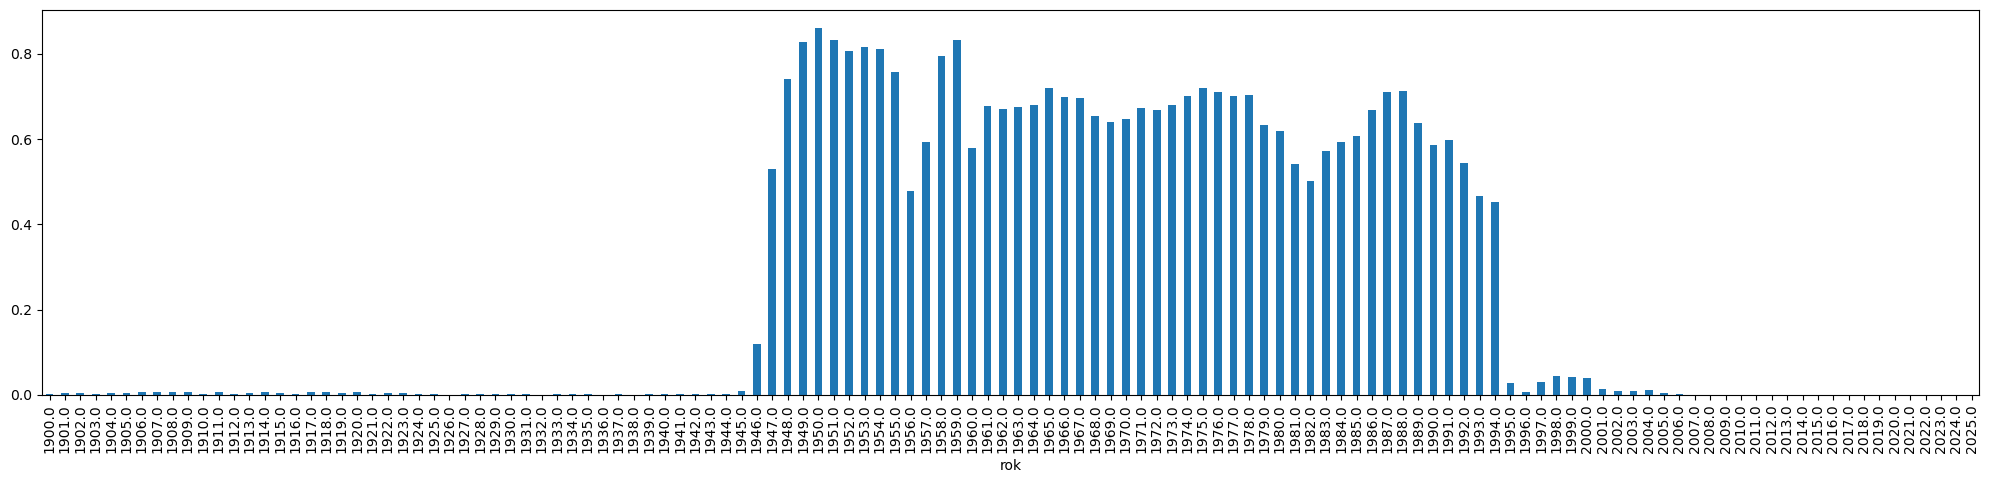

In [95]:
(df[df['964_a'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [99]:
df[df['245_a'].str.contains('Smetana')].sample(40).sort_values(by='rok')

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nos190114752,000221s1901 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01041690,"Holeček, František,",1871-1947,None,"Dr. Aug. Smetana, jeho filosofie a Paměti kněz...",František Holeček,None,None,None,None,None,[Praha :],"[Časop. Aletheia,]",[1901],None,None,None,None,None,None,None,[13 s. ;],None,[8°],None,None,[Zvl. otisk z Aletheie],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1901.0
nos190124902,000401s1901 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jo2009546529,"Kyjovský, Václav,",1852-1926,None,"Dr. Aug. Smetana, kněz odpadlík /",dle vlastních spisů jeho napsal Dr. V. Kyjovský,None,None,None,None,None,[V Praze :],"[Tiskem a nákladem družstva Vlasť,]",[1901],None,None,None,None,None,None,None,[38 s. ;],None,[14 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1901.0
nos190227235,000814s1910 xr ||| | cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01072927,"Machač, Josef,",1885-1950,None,Bedřich Smetana a cizina /,napsal Josef Machač,None,None,None,None,None,[Hradec Králové :],"[Bohd. Melichar,]",[1910],None,None,None,None,None,None,None,"[131, 3 s. ;]",None,[8°],[Melicharova bibliotéka ;],[sv. X],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Melicharova bibliotéka],None,None,nam a22 1 4500,1910.0
nos190104141001,000116s1910 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01012943,"Bráfová, Libuše,",1860-1930,None,"Rieger, Smetana, Dvořák /",Libuše Bráfová,None,None,None,None,None,[Praha :],"[Unie tisk.,]",[1910],None,None,None,None,None,None,None,[62 s. ;],None,[8°],None,None,[Otištěno z Vlčkovy Osvěty 1910],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1910.0
nos190121539001,000205s1911 xr cg 000 cze,None,None,[(Brož.)],None,None,None,None,None,None,None,[aut],jk01060822,"Knittl, Vladimír,",1887-,None,Bedřich Smetana :,Vladimír Knittl,None,None,None,None,None,[V Praze :],"[Fr. A. Urbánek,]",[[1911]],None,None,None,None,None,None,None,[67 s. :],"[1 portrét, noty ;]",[17 cm],"[Knihovna ""Smetany"" ;]",[č. 13],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Knihovna Smetany],None,None,nam a22 1 4500,1911.0
nos190114628,000202s1915 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01041532,"Hoffmeister, Karel,",1868-1952,None,Bedřich Smetana /,Karel Hoffmeister,None,None,None,None,None,[Praha :],"[Manes,]",[1915],None,None,None,None,None,None,None,[165 s. :],[obr. příl. ;],[8°],[Zlatoroh ;],[Sv. 24-28],[S 53 obr. příl. a faksim.],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Zlatoroh],None,None,nam a22 1 4500,1915.0
nos190118106,000228s1916 xr 000 | cze,None,"[K 0,48]",[(Brož.) :],None,None,None,None,None,None,None,[aut],jk01051479,"Jeremiáš, Jaroslav,",1889-1919,None,Ad vocem: Janáčkova Pastorkyňa a - Smetana :,Jaroslav Jeremiáš,None,None,None,None,None,[V Praze :],"[J. Jeremiáš,]",[1916],None,[(Em. Stivín)],None,None,None,None,None,[18 s. ;],None,[19 cm],[Jeremiášovy volné kapitoly ;],[1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Jeremiášovy volné kapitoly],None,None,nam a22 a 4500,1916.0
cpk

In [57]:
df[df['245_a'].str.contains('Masaryk')].sort_values(by='rok').head(40)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknkst04880,020418s1900 xr e 0dcze,None,None,None,None,None,None,None,[323],"[Vnitropolitický vývoj, politický život]","[343.611, 343.1, 323.12(=411.16), (437.324), (...",[aut],jk01150090,"Vlček, Ferdinand,",1868-1936,None,Odpověď Masarykovi o vraždě Polenské /,napsal Ferd. Vlček,None,None,None,[2. vyd.],None,[V Hradci Králové :],"[F. Vlček,]",[1900],None,[(Biskupská knihtiskárna)],None,None,None,None,None,[28 s. ;],None,[8°],None,None,None,None,None,None,None,"[1899, 19. století]","[vraždy, soudní procesy, antisemitismus]",None,"[1899, 19. století, 19. století]","[Česko, Česko, Česko]","[Polná (Jihlava, Česko)]",None,[polemiky],None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1900.0
nos190227968,000724s1903 xr cze,None,None,[(Váz.)],None,None,None,None,None,None,None,[aut],jk01080174,"Mareš, František,",1857-1942,None,Konec sporu o idealism a realism v přírodní vě...,František Mareš,None,None,None,None,None,[Praha :],"[[nákl.vl.],]",[1903],None,None,None,None,None,None,None,[41 s. ;],None,[8°],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1903.0
nos190118034,000223s1905 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01051432,"Jemelka, Alois,",1862-1917,None,Masarykův boj o náboženství /,Osvětluje Alois Jemelka,None,None,None,None,None,[Praha :],"[Kotrba tisk.,]",[1905],None,None,None,None,None,None,None,[61 s. ;],None,[8°],None,None,[Zvl. otisk z Křesťanské školy],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1905.0
nos190150877,000503s1907 xr ||| | cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01132799,"Topolský, Josef,",1872-1926,None,Útok prof. Masaryka na církev katolickou /,odrazil Dr. Josef Topolský,None,None,None,None,None,[Hradec Králové :],"[Polit. družstvo tisk.,]",[1907],None,None,None,None,None,None,None,[128 s. ;],None,[18 cm],[Časové úvahy ;],"[XI, 5-8]",[Vl. jm. autora: Josef Novotný],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Časové úvahy],None,None,nam a22 1 4500,1907.0
nos190247527001,000814s1907 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01122741,"Šelepa, František,",1887-1945,None,T.G. Masaryk :,PhDr. František Šelepa ; Naps. dr. A. K.,None,None,None,[1. vyd.],None,[Praha :],"[Ločák,]",[[1907]],None,None,None,None,None,None,None,[12 s. ;],None,[8°],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1907.0
nos190228478,000821s1907 xr ||| | cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01080472,"Masaryk, Tomáš Garrigue,",1850-1937,None,Řeč posl. T.G. Masaryka v debatě o zatímním ro...,None,None,None,None,None,None,[V Praze :],"[Čas,]",[1907],None,[(E. Beaufort)],None,None,None,None,None,[34 s. ;],None,[17 cm],[Knihovnička Času ;],[Č. 42],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Knihovnička Času (Čas)],None,None,nam a22 1 4500,1907.0
nos190248530,001004s1908 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01130979,"Šrámek, Jan,",1870-1956,None,Šrámek contra Masaryk /,řeč poslance docenta Jana Šrámka na říšské rad...,None,None,None,None,None,[Olomouc :],"[Našinec,]",[1908],None,None,None,None,None,None,None,"[42, 1 s. ;]",None,[16°],None,None,None,None,None,No

In [29]:
df[df['245_a'].str.contains('Masaryk')]['964_a'].to_list()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 array(['Masaryk, Tomáš Garrigue - projevy',
        'ČSR - politika - rok 1928 - projevy'], dtype=object),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 array(['Chelčický, Petr - Tolstoj, L.N. - Masaryk, T.G. - myšlení - studie srovnávací',
        'Tolstoj, Lev Nikolajevič - Chelčický, P. - Masaryk, T.G. - myšlení - studie srovnávací',
        'Masaryk, Tomáš Garrigue - Chelčický, P. - Tolstoj, L.N. - myšlení - studie srovnávací'],
       dtype=object),
 None,
 Non

In [23]:
df[df['245_a'].str.contains('Messi')]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk193102268,991105s1931 xr 000 | cze,None,"[Kč 30,00]",[(Brožováno) :],[cze],[rus],1,None,None,None,None,[aut],jn19990210422,"Merežkovskij, Dmitrij Sergejevič,",1865-1941,None,Messiáš /,D.S. Merežkovskij ; přeložil Václav Koenig,None,None,None,None,None,None,None,None,None,None,None,[V Praze :],"[Kvasnička a Hampl,]",[1931],[1],[314 stran ;],None,[18 cm],[Spisy D.S. Merežkovského ;],[svazek 22],[Přeloženo z ruštiny],None,None,None,None,None,None,None,None,None,None,None,None,[trl],[jk01061070],"[König, Václav,]",[1897-1944],None,None,None,None,None,None,None,nam a22 1i 4500,1931.0
bk194301515,990219s1942 xr cze,None,None,None,[cze],[ger],1,None,None,None,None,[aut],jn19992001048,"Schiller, Friedrich,",1759-1805,None,Messinská nevěsta :,Friedrich Schiller ; [přeložil z němčiny Frant...,None,None,None,[1. vyd.],None,[V Praze :],"[Fr. Borový,]",[1942],[(v Brně :],[Akciová moravská knihtiskárna Polygrafie)],None,None,None,None,None,"[171, [II] s. :]",[[I] příl. obr. příl. ;],[8°],[Pantheon. Řada II ;],[sv. 6],[Obálka Fr. Muziky],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Pantheon (Fr. Borový)],None,None,nam a22 1 4500,1942.0
cpk20233522961,230530s1922 xr ||| | cze,None,None,None,None,None,None,None,None,None,None,[aut],kpwa2754,"Josafat, František,",None,None,"Splněné touhy, čili, Příchod Messiáše :",pro jeviště upravil Fr. Josafat,None,None,[Příchod Messiáše],None,None,None,None,None,None,None,None,[V Brně :],"[tiskem a nákladem Benediktínské knihtiskárny,]",[[1922]],[1],[50 stran ;],None,[18 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,1922.0
nkc20071716621,070402s2006 xr acf e 000 0bcze d,[80-7281-248-3],None,[(váz.)],[cze],[ger],1,None,"[133, 929]","[Ezoterismus. Okultismus, Biografie]","[929, 133.3-051, (438), (092)]",[aut],xx0043354,"Küppers, Topsy,",1931-,None,Wolf Messing :,Topsy Küppers ; [přeložila Jana Zoubková],None,None,[Stalinův jasnovidec],None,None,[Praha :],"[Eminent,]",[c2006],None,None,None,None,None,None,None,"[340 s., [8] s. obr. příl. :]","[il., portréty ;]",[22 cm],None,None,[Přeloženo z němčiny],None,None,None,None,[19.-20. století],"[jasnovidci, clairvoyants]",None,"[19.-20. století, 19th-20th centuries]","[Polsko, Poland]",None,None,"[biografie, biography]",None,None,None,None,None,None,None,None,None,None,None,cam a22 a 4500,2006.0
nkc20081835104,081210s2008 xr acg e 000 0bcze,[978-80-7225-279-4],None,[(brož.)],None,None,None,None,"[78.07, 929]","[Hudebníci, skladatelé a jiná hudební povolání...","[929, 78.071.1, 78, (44), (0:82-94)]",[aut],jk01082776,"Navrátil, Miloš,",1932-2019,None,Olivier Messiaen - osobnost nové hudby :,Miloš Navrátil,None,None,None,None,None,[Ostrava :],"[Montanex,]",[2008],None,None,None,None,None,None,None,[71 s. :],"[il., noty ;]",[21 cm],None,None,None,None,None,None,None,[1908-1992],"[hudební skladatelé, hudba, composers, music]",None,"[20. století, 20. století, 20th century, 20th ...","[Francie, Francie, France, France]",None,None,"[medailony, biographical portraits]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,2008.0
nkc20122396630,120910s2012 xr acf e 000 0bcze,[978-80-7388-732-2],None,[(váz.)],None,None,None,None,"[796, 929]","[Sport. Hry. Tělesná cvičení, Biografie]","[929, 796.332.071.2, 796.332:061, 796.332, (82...",[aut],jn20000401692,"Macho, Milan,",1947-,None,Fotbalový poklad Messi :,Milan Macho,None,None,[Messi],None,None,[Praha :]

In [21]:
df[df['245_a'].str.contains('Messi')]['650_a'].to_list()

[None,
 None,
 None,
 array(['jasnovidci', 'clairvoyants'], dtype=object),
 array(['hudební skladatelé', 'hudba', 'composers', 'music'], dtype=object),
 array(['fotbalisté', 'fotbalové kluby', 'fotbal', 'soccer players',
        'soccer clubs', 'soccer'], dtype=object),
 array(['fotbalisté', 'fotbalové kluby', 'fotbal', 'soccer players',
        'soccer clubs', 'soccer'], dtype=object),
 array(['fotbalisté', 'fotbal', 'soccer players', 'soccer'], dtype=object),
 array(['fotbalisté', 'fotbalové kluby', 'soccer players', 'soccer clubs'],
       dtype=object),
 array(['fotbalisté', 'fotbalové kluby', 'fotbal', 'soccer players',
        'soccer clubs', 'soccer'], dtype=object),
 array(['fotbalisté', 'fotbal', 'soccer players', 'soccer'], dtype=object),
 array(['fotbalisté', 'fotbalové kluby', 'fotbal', 'soccer players',
        'soccer clubs', 'soccer'], dtype=object),
 array(['fotbalisté', 'fotbal', 'fotbalové kluby', 'soccer players',
        'soccer', 'soccer clubs'], dtype=object),
 ar

In [51]:
bio = df[df['655_a'].astype(str).str.contains('biografi',na=False) 
| df['655_a'].astype(str).str.contains('biograph',na=False)
| df['655_a'].astype(str).str.contains('medailon',na=False)
| df['072_x'].astype(str).str.contains('Biografie',na=False)
]

<Axes: xlabel='rok'>

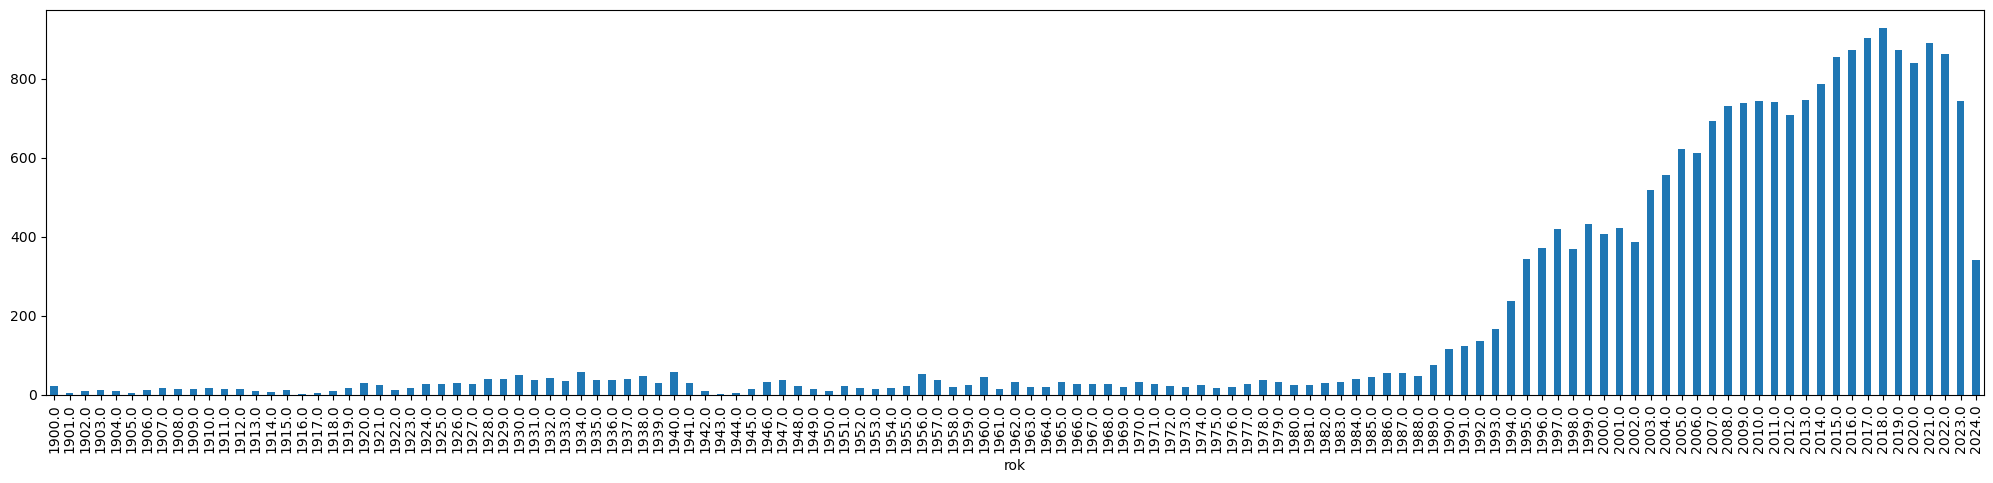

In [53]:
bio.groupby('rok').size().plot.bar(figsize=(25,5))

In [83]:
def slova(nazev):
    try:
        slova = [''.join([z for z in y if z.isalpha()]) for y in nazev.split(' ')]
        slova = [x for x in slova if len(x) > 2]
        slova = [x for x in slova if x[0] in 'ABCDEFGHIJKLMNOPQRTSTUVWXYZÁÉÍÓÚŮŠČŘŽĎŇ']
        return slova
    except:
        print(nazev)

In [85]:
bio['slova'] = bio['245_a'].apply(lambda x: slova(x))

['Hudební', 'skladatel', 'Josef', 'Klička', '']
['Vzpomínky', 'a', 'dopisy', '']
['Zdenka', 'Fibicha', 'milostný', 'deník', '']
['Kapitoly', 'z', 'české', 'vojenské', 'minulosti']
['Ta', 'Hradišťská', 'brána', '', '']
['Ze', 'zápisků', 'posledního', 'lancknechta', '']
['Záhada', 'Templu', '']
['Zpověď', 'caru', 'Mikuláši', 'I', '']
['Žižka', 'náš', 'bratr', 'věrný', '']
['Má', 'vězení', '']
['Jindřich', 'Fügner', '']
['Našemu', 'osvoboditeli', '']
['Matka', 'a', 'dítě', '']
['Zápisky', 'spisovatelovy', '']
['Lovčen', '']
['Cesta', 'Husova', '']
['Jovan', 'Cvijić', '']
['Rosnička', '']
['Náš', 'první', 'president', '']
['K', 'Křen', '']
['Michelagnolo', 'Buonarroti', '']
['Lionardo', 'da', 'Vinci', 'Antonio', 'da', 'Correggio', 'Rafaello', 'Sanzio', 'da', 'Urbino', '']
['Henri', 'Dunant', '']
['Válečný', 'deník', 'Jendy', 'Hofmana', 'letcedobrovolce', '']
['Plukovník', 'Josef', 'Švec', 'Sokol', 'legionář', '']
['Jaroslav', 'Hašek', '']
['Masaryk', 'o', 'sobě', 'a', 'svém', 'díle', '']
[

C:\Users\micha\AppData\Local\Temp\ipykernel_6904\23273328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bio['slova'] = bio['245_a'].apply(lambda x: slova(x))


In [87]:
bio['slova']

001
bk192600269                  [Hudební, Josef, Klička]
bk192600519                               [Vzpomínky]
bk192600932                         [Zdenka, Fibicha]
bk192602351                                [Kapitoly]
bk192602525                              [Hradišťská]
                                 ...                 
srk19960152603                 [Jan, Werich, Potlach]
srk19960155178      [Antonín, Vimmer, Jan, Pastejřík]
srk19960163886                           [Havlíčkovy]
vsII/171325         [Petr, Bezruč, Julii, Chovancové]
zb00389           [Filozof, Tomáš, Garrigue, Masaryk]
Name: slova, Length: 22685, dtype: object

In [89]:
bio.explode('slova').groupby('slova').size().nlargest(500)

slova
Život            380
Jan              360
Jak              297
Vzpomínky        263
Josef            248
Karel            225
Můj              218
František        205
Paměti           157
Moje             140
Cesta            138
Deník            132
Václav           118
Marie            101
Jana              94
Jiří              94
Příběhy           88
Svatý             85
Příběh            83
Poslední          80
Jaroslav          79
Osobnosti         75
Kdo               72
Když              72
Dopisy            70
Františka         70
Antonín           66
Petr              59
Josefa            58
Ženy              57
Rudolf            54
Karla             53
Masaryk           51
Zápisky           51
Boží              50
Vladimír          49
Alois             48
Zpověď            47
Muž               46
Pavel             46
Tajemství         46
Tři               46
Čechách           45
Osvětimi          44
Tomáš             44
Český             44
Zdeněk            43
České  

In [ ]:
osobnosti = ['Masaryk','Marie Terezie','Hitler','Stalin','Baťa','Ježíš','da Vinci','Churchill']